In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [183]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [184]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
print("Shape of training data : ",train.shape)
print("Shape of testing data : ",test.shape)

Shape of training data :  (891, 12)
Shape of testing data :  (418, 11)


In [187]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [188]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [189]:
print(train.isna().sum())
print("Total Values: ",train.isna().sum().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total Values:  866


In [190]:
print(test.isna().sum())
print("Total Values: ",test.isna().sum().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Total Values:  414


<AxesSubplot:>

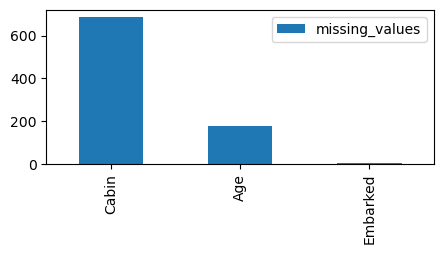

In [191]:
train_df=pd.DataFrame(train.isna().sum().sort_values(ascending=False),columns=['missing_values'])
train_df[train_df['missing_values']>0].plot.bar(figsize=(5,2))

In [192]:
train_df[train_df['missing_values']>0]

,missing_values
Cabin,687
Age,177
Embarked,2


<AxesSubplot:>

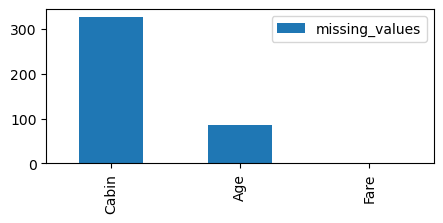

In [193]:
test_df=pd.DataFrame(test.isna().sum().sort_values(ascending=False),columns=['missing_values'])
test_df[test_df['missing_values']>0].plot.bar(figsize=(5,2))

In [194]:
test_df[test_df['missing_values']>0]

,missing_values
Cabin,327
Age,86
Fare,1


In [195]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Age"].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [196]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Age"].head(10)

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64

In [197]:
print(train.isna().sum())
print("Total Values: ",test.isna().sum().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total Values:  328


In [198]:
print(train.Cabin.isnull().sum() / len(train))

0.7710437710437711


In [199]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
# train.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)
# test.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)

In [201]:
train.Embarked=train.Embarked.map({'S':0,'C':1,'Q':2,'nan':'NaN'})
train.Sex=train.Sex.map({'female':0,'male':1})

In [202]:
print(train['Embarked'].unique())
print(train['Embarked'].nunique())

[0 1 2 nan]
3


In [203]:
Embarked = train['Embarked'].mode()
print(Embarked)

0    0
Name: Embarked, dtype: object


In [204]:
train['Embarked'] = train['Embarked'].fillna('0')

In [205]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [206]:
train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
0,0.742038
1,0.188908


In [207]:
train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
0,1.000000
1,0.553571
2,0.389610
0,0.336957


In [208]:
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [209]:
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [210]:
pivot =train.pivot_table("Survived",index = ["Embarked","Pclass","SibSp"], columns = "Sex")
pivot

Sex                           0         1
Embarked Pclass SibSp                    
0        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000
1        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
2        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
0        1      0      1.000000       NaN

array([<AxesSubplot:ylabel='count'>], dtype=object)

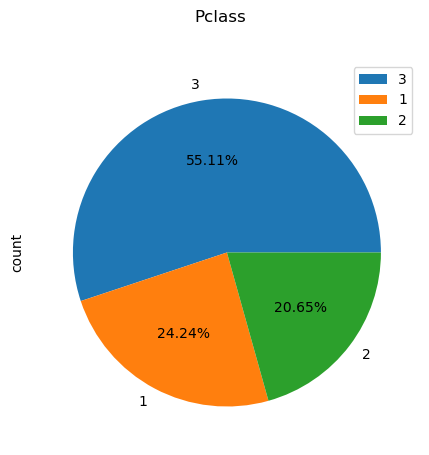

In [211]:
df.groupby('Pclass')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Pclass',figsize=(5,5))

array([<AxesSubplot:ylabel='count'>], dtype=object)

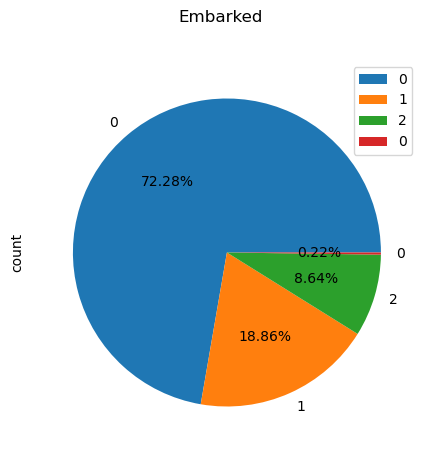

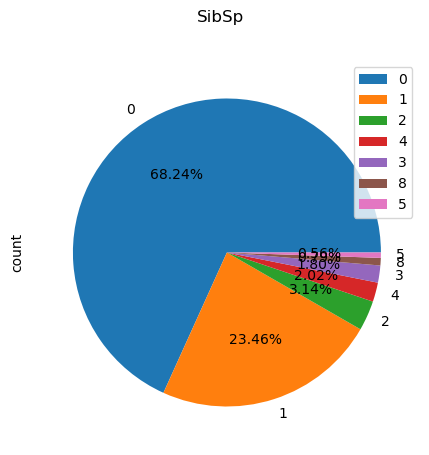

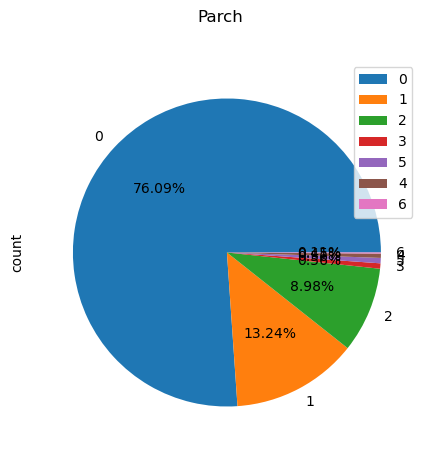

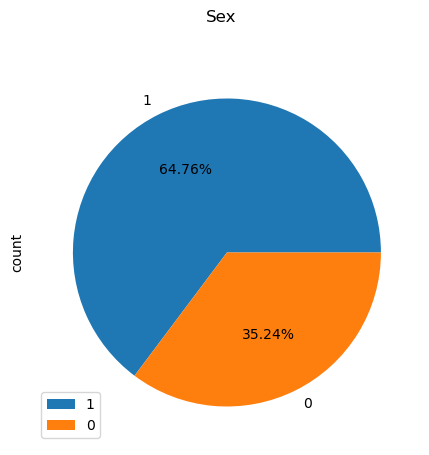

In [212]:
train.groupby('Embarked')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Embarked',figsize=(5,5))
train.groupby('SibSp')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='SibSp',figsize=(5,5))
train.groupby('Parch')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Parch',figsize=(5,5))
train.groupby('Sex')['Survived'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Sex',figsize=(5,5))


In [213]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000


<AxesSubplot:>

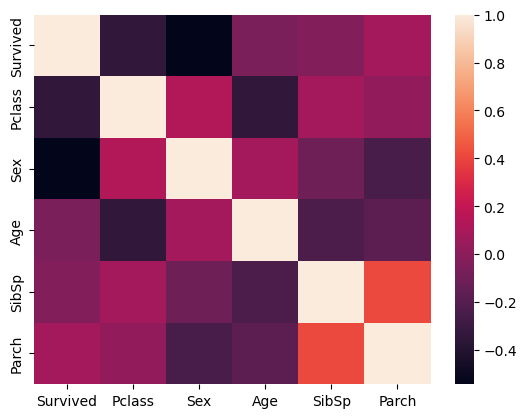

In [214]:
sns.heatmap(train.corr())

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [245]:
X = pd.get_dummies(train[['Sex', 'SibSp', 'Parch', 'Pclass']])
y = train['Survived']

X.head(5)

,Sex,SibSp,Parch,Pclass
0,1,1,0,3
1,0,1,0,1
2,0,0,0,3
3,0,1,0,1
4,1,0,0,3


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [249]:
print( X_train.shape, X_test.shape)

(623, 4) (268, 4)


In [219]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

X = np.reshape(['male', 'male', 'female'], (-1, 1))

OrdinalEncoder().fit_transform(X)

array([[1.],
       [1.],
       [0.]])

In [220]:
classifier = svm.SVC(kernel='linear')

In [221]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [222]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7849117174959872


In [223]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7910447761194029


In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

rfr = RandomForestRegressor()

In [225]:
rfr.fit(X_train,y_train)
y_pred =  rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

In [226]:
y_pred

array([0.40831273, 0.10881083, 0.13307629, 1.        , 0.4256212 ,
       0.96089291, 0.54265481, 0.12613611, 0.54265481, 0.9675    ,
       0.41389638, 0.13307629, 0.06      , 0.13307629, 0.10881083,
       1.        , 0.41389638, 0.54265481, 0.10881083, 0.27711772,
       0.13307629, 0.27711772, 0.4256212 , 0.13307629, 0.13307629,
       0.31027381, 0.27711772, 0.10881083, 0.31027381, 0.54265481,
       0.13307629, 0.54265481, 0.27711772, 0.54265481, 0.13307629,
       0.16315883, 0.27711772, 0.54265481, 0.96089291, 0.13307629,
       0.01716484, 0.16315883, 0.13307629, 0.13307629, 0.66984603,
       0.27344481, 0.13307629, 0.13307629, 0.13307629, 0.86850108,
       0.91945238, 1.        , 0.08686147, 0.38569048, 0.13307629,
       0.9675    , 0.10881083, 1.        , 1.        , 0.54265481,
       0.13307629, 1.        , 0.81878577, 0.27711772, 0.13307629,
       1.        , 0.10881083, 0.13307629, 0.40831273, 1.        ,
       1.        , 0.54865476, 0.27711772, 1.        , 0.13307

In [227]:
score = rfr.score(X_train,y_train)
score

0.47204598429671785

In [228]:
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred)
rscore

0.37450393948694927

In [229]:
print('Explained variance score: %.2f' % explained_variance_score(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Explained variance score: 0.37
Mean squared error: 0.15
Variance score: 0.37


In [242]:
test_df = pd.read_csv('test.csv')
test_df.Sex=test_df.Sex.map({'female':0,'male':1})

X_test = pd.get_dummies(test_df[['Sex', 'SibSp', 'Parch', 'Pclass']])


model = classifier.fit(X_train,y_train)
preds = model.predict(X_test)

results = pd.DataFrame({
    'PassengerId': test_df['PassengerId'], 
    'Survived': preds
})

results.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [243]:
results.to_csv('submission.csv', index=False)
print("Successfully Created!")

Successfully Created!
